/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


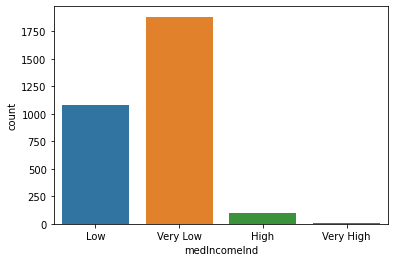

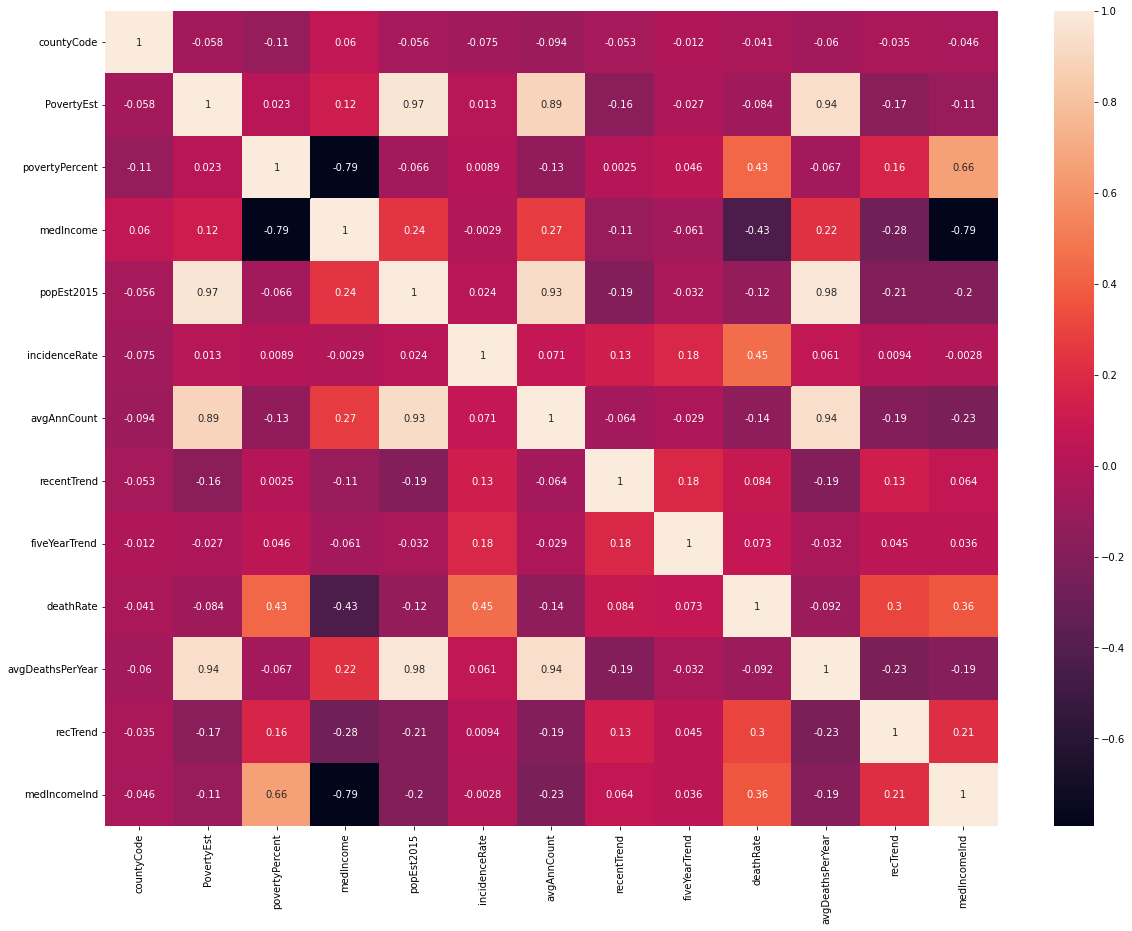

model's R2 score with alpha=1.0: 0.37573220464089985
model's R2 score with alpha=2.0: 0.34871546555362143
model's R2 score with alpha=3.0: 0.3357535819534666
model's R2 score with alpha=4.0: 0.33065639085625964
model's R2 score with alpha=5.0: 0.32793861991333784


In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
df = pd.read_csv("BINSupdateCopy.csv")

#fill in missing values of fiveYearTrend variable with average value of column
df = df.fillna(df.mean())

ax = sn.countplot(x="medIncomeInd", data=df)
plt.show()

#ordinal encode
df.recentTrend=df.recentTrend.astype('category').cat.codes

df.recTrend=df.recTrend.astype('category').cat.codes

df.medIncomeInd=df.medIncomeInd.astype('category').cat.codes

#correlation matrix
corrMatrix = df.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

#one hot encode
one_hot = pd.get_dummies(df['State'], prefix="State")
df = df.drop('State',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Name'], prefix="Name")
df = df.drop('Name',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['County'], prefix="County")
df = df.drop('County',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['countyName'], prefix="countyName")
df = df.drop('countyName',axis = 1)
df = df.join(one_hot)

#Lasso regression

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['incidenceRate']), df['incidenceRate'], test_size=0.2)

#hyperparameter tuning

model = Lasso(alpha=1.0)
model.fit(x_train, y_train)
print(f"model's R2 score with alpha=1.0: {model.score(x_test, y_test)}")


model = Lasso(alpha=2.0)
model.fit(x_train, y_train)
print(f"model's R2 score with alpha=2.0: {model.score(x_test, y_test)}")


model = Lasso(alpha=3.0)
model.fit(x_train, y_train)
print(f"model's R2 score with alpha=3.0: {model.score(x_test, y_test)}")


model = Lasso(alpha=4.0)
model.fit(x_train, y_train)
print(f"model's R2 score with alpha=4.0: {model.score(x_test, y_test)}")


model = Lasso(alpha=5.0)
model.fit(x_train, y_train)
print(f"model's R2 score with alpha=5.0: {model.score(x_test, y_test)}")